In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#    -Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#    -City, country, and date
#    -Latitude and longitude
#    -Maximum temperature
#    -Humidity
#    -Cloudiness
#    -Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c95f0d0ef08ff2d83b62b6ee1847479


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(2)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | andenes
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | kargasok
Processing Record 5 of Set 1 | chippewa falls
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | santiago
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | wagar
Processing Record 17 of Set 1 | bhaktapur
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 22 of Set 1 | barrow

Processing Record 37 of Set 4 | mashhad
Processing Record 38 of Set 4 | wewak
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | antalaha
Processing Record 41 of Set 4 | forrest city
Processing Record 42 of Set 4 | knysna
Processing Record 43 of Set 4 | waling
Processing Record 44 of Set 4 | buariki
City not found. Skipping...
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | bogoslovka
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | urengoy
Processing Record 49 of Set 4 | goderich
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | faanui
Processing Record 2 of Set 5 | san jeronimo
Processing Record 3 of Set 5 | gumdag
Processing Record 4 of Set 5 | gimli
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 5 | enid
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | yatou
Processing Record 9 of Set 5 | sosnovo-ozerskoye
Processing Record 10 of Set 5 | matara
Processing

Processing Record 29 of Set 8 | dabwali
Processing Record 30 of Set 8 | chicama
Processing Record 31 of Set 8 | indian head
Processing Record 32 of Set 8 | miracema do tocantins
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | kharitonovo
Processing Record 35 of Set 8 | harlingen
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | kyren
Processing Record 38 of Set 8 | laerdalsoyri
Processing Record 39 of Set 8 | matay
Processing Record 40 of Set 8 | evensk
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | san rafael
Processing Record 43 of Set 8 | marawi
Processing Record 44 of Set 8 | oktyabrskiy
Processing Record 45 of Set 8 | cabangahan
Processing Record 46 of Set 8 | ksenyevka
City not found. Skipping...
Processing Record 47 of Set 8 | champerico
Processing Record 48 of Set 8 | nabire
Processing Record 49 of Set 8 | freeport
Processing Record 50 of Set 8 | ust-nera
Processing Record 1 of Set 9 | flinders
Process

Processing Record 14 of Set 12 | zeya
Processing Record 15 of Set 12 | zhireken
Processing Record 16 of Set 12 | mutoko
Processing Record 17 of Set 12 | quelimane
Processing Record 18 of Set 12 | palmer
Processing Record 19 of Set 12 | flin flon
Processing Record 20 of Set 12 | camapua
Processing Record 21 of Set 12 | jaitaran
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | sumenep
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | portobelo
Processing Record 26 of Set 12 | eirunepe
Processing Record 27 of Set 12 | panguipulli
Processing Record 28 of Set 12 | melilla
Processing Record 29 of Set 12 | saskylakh
Processing Record 30 of Set 12 | pannonhalma
Processing Record 31 of Set 12 | huesca
Processing Record 32 of Set 12 | charleston
Processing Record 33 of Set 12 | la macarena
Processing Record 34 of Set 12 | shingu
Processing Record 35 of Set 12 | la ronge
Processing Record 36 of Set 12 | karaton
Processing Record 37 of Set 

In [11]:
len(city_data)

544

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Andenes,69.3143,16.1194,22.98,63,33,17.27,NO,2022-02-02 22:49:23
1,Qaanaaq,77.4840,-69.3632,-13.70,83,100,6.87,GL,2022-02-02 22:49:24
2,New Norfolk,-42.7826,147.0587,60.71,53,74,3.00,AU,2022-02-02 22:49:24
3,Kargasok,59.0556,80.8572,11.10,93,91,9.17,RU,2022-02-02 22:49:24
4,Chippewa Falls,44.9369,-91.3929,9.54,52,0,10.36,US,2022-02-02 22:47:07
5,Avarua,-21.2078,-159.7750,84.25,79,40,18.41,CK,2022-02-02 22:49:25
6,Ushuaia,-54.8000,-68.3000,44.26,57,75,25.32,AR,2022-02-02 22:45:41
7,Nanortalik,60.1432,-45.2371,8.10,63,43,7.74,GL,2022-02-02 22:49:26
8,Tuktoyaktuk,69.4541,-133.0374,-22.00,76,75,13.80,CA,2022-02-02 22:49:14
9,Mount Gambier,-37.8333,140.7667,58.91,63,100,11.50,AU,2022-02-02 22:49:26


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Andenes,NO,2022-02-02 22:49:23,69.3143,16.1194,22.98,63,33,17.27
1,Qaanaaq,GL,2022-02-02 22:49:24,77.4840,-69.3632,-13.70,83,100,6.87
2,New Norfolk,AU,2022-02-02 22:49:24,-42.7826,147.0587,60.71,53,74,3.00
3,Kargasok,RU,2022-02-02 22:49:24,59.0556,80.8572,11.10,93,91,9.17
4,Chippewa Falls,US,2022-02-02 22:47:07,44.9369,-91.3929,9.54,52,0,10.36
5,Avarua,CK,2022-02-02 22:49:25,-21.2078,-159.7750,84.25,79,40,18.41
6,Ushuaia,AR,2022-02-02 22:45:41,-54.8000,-68.3000,44.26,57,75,25.32
7,Nanortalik,GL,2022-02-02 22:49:26,60.1432,-45.2371,8.10,63,43,7.74
8,Tuktoyaktuk,CA,2022-02-02 22:49:14,69.4541,-133.0374,-22.00,76,75,13.80
9,Mount Gambier,AU,2022-02-02 22:49:26,-37.8333,140.7667,58.91,63,100,11.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

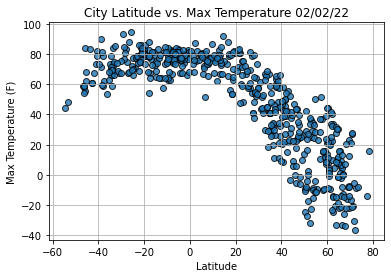

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

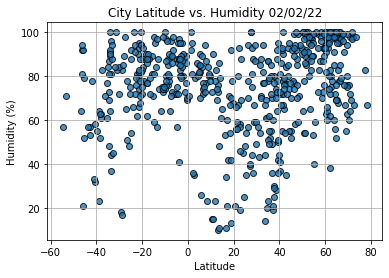

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

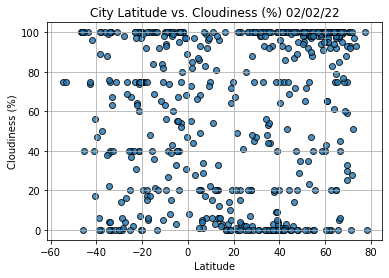

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

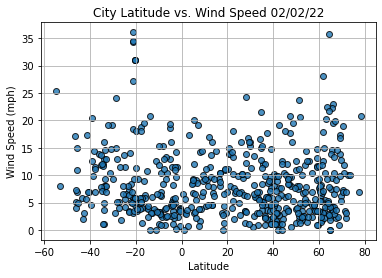

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Hasaki
Country                        JP
Date          2022-02-02 22:49:27
Lat                       35.7333
Lng                      140.8333
Max Temp                     27.0
Humidity                       52
Cloudiness                     44
Wind Speed                  12.08
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
539     True
540     True
541     True
542     True
543     True
Name: Lat, Length: 544, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Andenes,NO,2022-02-02 22:49:23,69.3143,16.1194,22.98,63,33,17.27
1,Qaanaaq,GL,2022-02-02 22:49:24,77.4840,-69.3632,-13.70,83,100,6.87
3,Kargasok,RU,2022-02-02 22:49:24,59.0556,80.8572,11.10,93,91,9.17
4,Chippewa Falls,US,2022-02-02 22:47:07,44.9369,-91.3929,9.54,52,0,10.36
7,Nanortalik,GL,2022-02-02 22:49:26,60.1432,-45.2371,8.10,63,43,7.74
...,...,...,...,...,...,...,...,...,...
539,Iqaluit,CA,2022-02-02 22:53:31,63.7506,-68.5145,8.33,85,100,9.22
540,Del Rio,US,2022-02-02 22:53:32,29.3627,-100.8968,53.62,87,100,16.11
541,Hurricane,US,2022-02-02 22:50:19,37.1753,-113.2899,41.70,21,0,17.69
542,Qinzhou,CN,2022-02-02 22:53:32,21.9500,108.6167,47.43,80,100,14.29


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

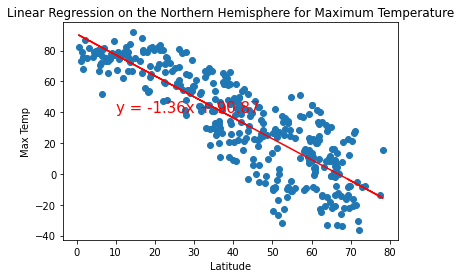

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

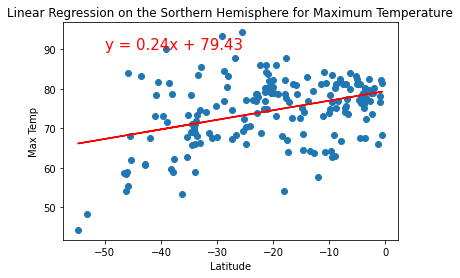

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Sorthern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [27]:
# Check the r-values for your plots

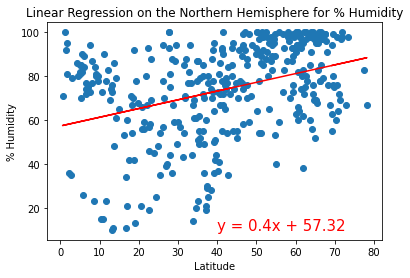

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

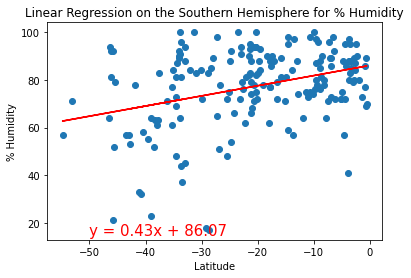

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [30]:
# Check the r-values for your plots

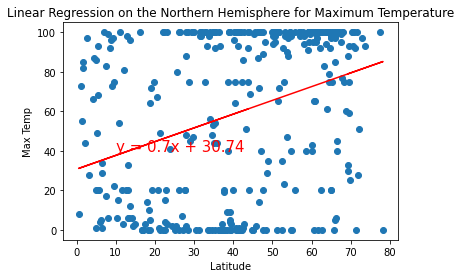

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

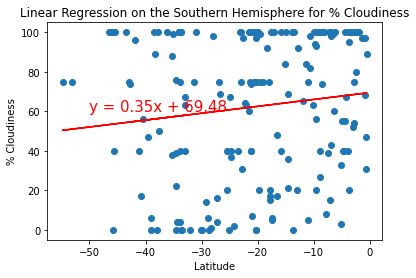

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [38]:
# Check the r-values for your plots

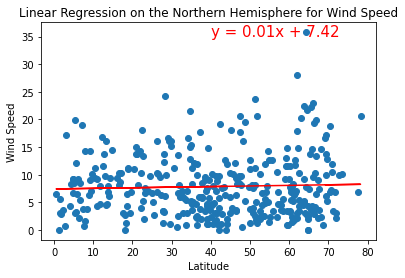

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

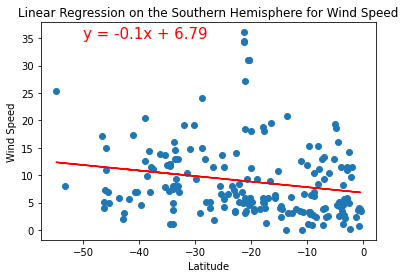

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))